Sleep_Duration Improvement (Pre vs. Post): t=-4.78, p=0.0000
Sleep_Quality Improvement (Pre vs. Post): t=4.57, p=0.0000
Sleep_Hygiene Improvement (Pre vs. Post): t=3.31, p=0.0016
Sleep_Duration Post-Program Comparison (Online vs. In-Person): t=-0.28, p=0.7824
Sleep_Quality Post-Program Comparison (Online vs. In-Person): t=0.08, p=0.9403
Sleep_Hygiene Post-Program Comparison (Online vs. In-Person): t=-0.57, p=0.5741


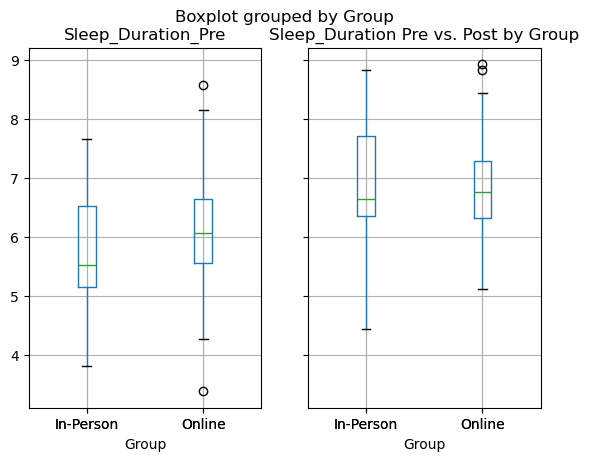

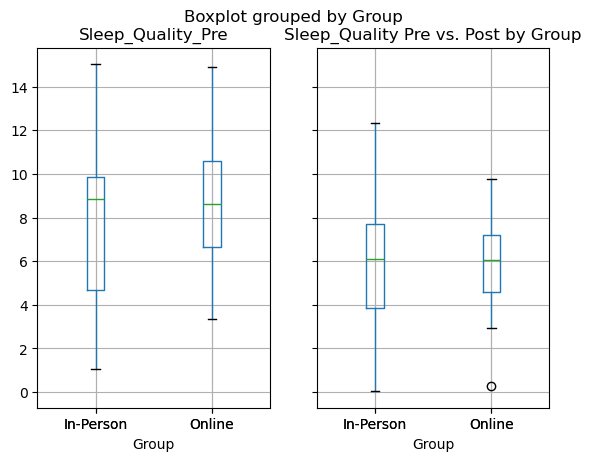

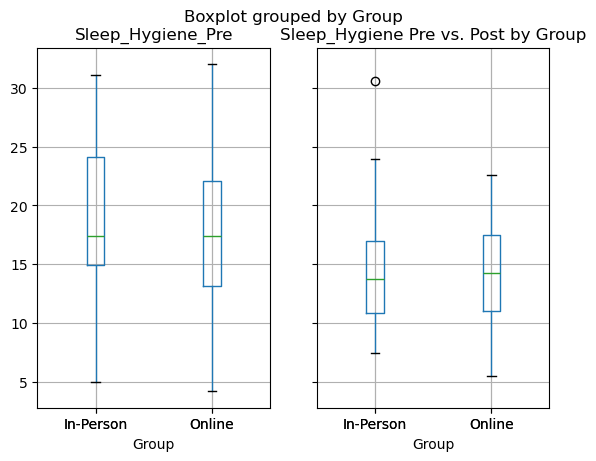

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_rel, ttest_ind

# Load Data
data = pd.DataFrame({
    'Participant': range(1, 61), 
    'Group': np.random.choice(['Online', 'In-Person'], size=60),
    'Sleep_Duration_Pre': np.random.normal(6.4, 1.2, 60),
    'Sleep_Duration_Post': np.random.normal(6.8, 1.0, 60),
    'Sleep_Quality_Pre': np.random.normal(7.6, 3.1, 60),
    'Sleep_Quality_Post': np.random.normal(5.7, 2.5, 60),
    'Sleep_Hygiene_Pre': np.random.normal(16.4, 7.1, 60),
    'Sleep_Hygiene_Post': np.random.normal(13.5, 5.4, 60)
})

# Analysis: Improvements within each group
for metric in ['Sleep_Duration', 'Sleep_Quality', 'Sleep_Hygiene']:
    pre = data[f'{metric}_Pre']
    post = data[f'{metric}_Post']
    t_stat, p_value = ttest_rel(pre, post)
    print(f"{metric} Improvement (Pre vs. Post): t={t_stat:.2f}, p={p_value:.4f}")

# Analysis: Between group comparison for post-program scores
for metric in ['Sleep_Duration', 'Sleep_Quality', 'Sleep_Hygiene']:
    online = data.loc[data['Group'] == 'Online', f'{metric}_Post']
    in_person = data.loc[data['Group'] == 'In-Person', f'{metric}_Post']
    t_stat, p_value = ttest_ind(online, in_person)
    print(f"{metric} Post-Program Comparison (Online vs. In-Person): t={t_stat:.2f}, p={p_value:.4f}")

# Visualization
metrics = ['Sleep_Duration', 'Sleep_Quality', 'Sleep_Hygiene']
for metric in metrics:
    data.boxplot(column=[f'{metric}_Pre', f'{metric}_Post'], by='Group')
    plt.title(f'{metric} Pre vs. Post by Group')
    plt.ylabel(metric)
    plt.show()


In [2]:
# Install common packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
raw_data = pd.read_csv('sleep_health_data.csv')
# View histograms/counts for relevant variables

raw_data['Gender'].value_counts()

Gender
Male      189
Female    185
Name: count, dtype: int64

In [3]:
raw_data['Occupation'].value_counts()

Occupation
Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Software Engineer        4
Scientist                4
Sales Representative     2
Manager                  1
Name: count, dtype: int64

(array([32., 48., 26., 55., 25., 78., 14., 37., 26., 33.]),
 array([27. , 30.2, 33.4, 36.6, 39.8, 43. , 46.2, 49.4, 52.6, 55.8, 59. ]),
 <BarContainer object of 10 artists>)

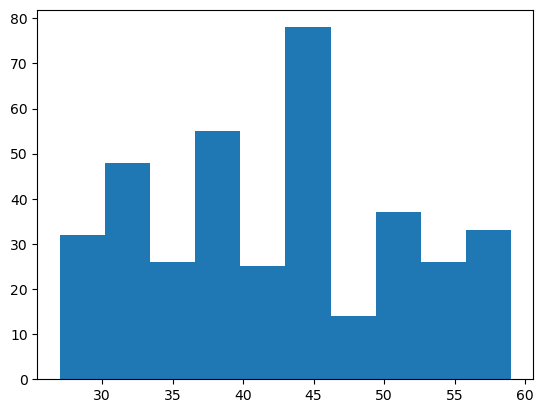

In [4]:
plt.hist(raw_data.Age)

(array([  8.,   9.,  70.,   8.,  69.,  69.,   4., 101.,   0.,  36.]),
 array([ 3000.,  3700.,  4400.,  5100.,  5800.,  6500.,  7200.,  7900.,
         8600.,  9300., 10000.]),
 <BarContainer object of 10 artists>)

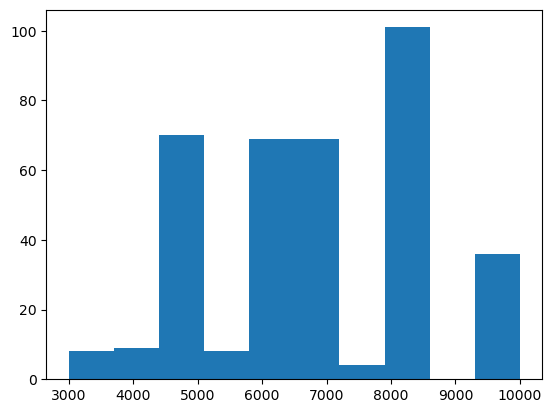

In [5]:
plt.hist(raw_data['Daily Steps'])

In [6]:
raw_data['Sleep Disorder'].value_counts(sort=True)
raw_data['BMI Category'].value_counts()

BMI Category
Normal           195
Overweight       148
Normal Weight     21
Obese             10
Name: count, dtype: int64

In [7]:
# Combine 'Normal' and 'Normal Weight' categories since they appear to mean the same thing
raw_data['BMI Category'] = raw_data['BMI Category'].replace({'Normal Weight': 'Normal'})
raw_data['BMI Category'].value_counts()

BMI Category
Normal        216
Overweight    148
Obese          10
Name: count, dtype: int64

In [8]:
# creating a dataframe of just the numerical variables
data_num = raw_data[['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps']]
# View basic stats of all variables in data_num
data_num.describe()

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [9]:
# Convert to numeric and handle non-numeric values
raw_data['Quality of Sleep'] = pd.to_numeric(raw_data['Quality of Sleep'], errors='coerce')

# Drop rows with NaN values after coercion
raw_data = raw_data.dropna(subset=['Quality of Sleep'])


In [10]:
result = raw_data.groupby('Gender')['Quality of Sleep'].mean().sort_values()
print(result)


Gender
Male      6.968254
Female    7.664865
Name: Quality of Sleep, dtype: float64


In [10]:
result = raw_data.groupby('Occupation')['Quality of Sleep'].mean().sort_values()
print(result)


Occupation
Sales Representative    4.000000
Scientist               5.000000
Salesperson             6.000000
Software Engineer       6.500000
Doctor                  6.647887
Teacher                 6.975000
Manager                 7.000000
Nurse                   7.369863
Accountant              7.891892
Lawyer                  7.893617
Engineer                8.412698
Name: Quality of Sleep, dtype: float64


In [11]:
numeric_data = raw_data.select_dtypes(include=['number'])
result = raw_data.groupby('BMI Category')[numeric_data.columns].mean()
print(result)


               Person ID        Age  Sleep Duration  Quality of Sleep  \
BMI Category                                                            
Normal        139.648148  38.472222        7.387963          7.638889   
Obese         134.900000  38.000000        6.960000          6.400000   
Overweight    260.891892  47.885135        6.770270          6.898649   

              Physical Activity Level  Stress Level  Heart Rate  Daily Steps  
BMI Category                                                                  
Normal                      57.949074      5.134259   68.976852  6875.462963  
Obese                       55.000000      5.700000   84.300000  3350.000000  
Overweight                  61.236486      5.729730   70.945946  6965.540541  


In [12]:
result = raw_data.groupby('BMI Category')[numeric_data.columns].mean()
print(result)


               Person ID        Age  Sleep Duration  Quality of Sleep  \
BMI Category                                                            
Normal        139.648148  38.472222        7.387963          7.638889   
Obese         134.900000  38.000000        6.960000          6.400000   
Overweight    260.891892  47.885135        6.770270          6.898649   

              Physical Activity Level  Stress Level  Heart Rate  Daily Steps  
BMI Category                                                                  
Normal                      57.949074      5.134259   68.976852  6875.462963  
Obese                       55.000000      5.700000   84.300000  3350.000000  
Overweight                  61.236486      5.729730   70.945946  6965.540541  


In [13]:
numeric_columns = raw_data.select_dtypes(include=["number"]).columns
result = raw_data.groupby('BMI Category')[numeric_columns].mean()
print(result)


               Person ID        Age  Sleep Duration  Quality of Sleep  \
BMI Category                                                            
Normal        139.648148  38.472222        7.387963          7.638889   
Obese         134.900000  38.000000        6.960000          6.400000   
Overweight    260.891892  47.885135        6.770270          6.898649   

              Physical Activity Level  Stress Level  Heart Rate  Daily Steps  
BMI Category                                                                  
Normal                      57.949074      5.134259   68.976852  6875.462963  
Obese                       55.000000      5.700000   84.300000  3350.000000  
Overweight                  61.236486      5.729730   70.945946  6965.540541  


In [14]:
# Ensure only numeric columns are used
numeric_columns = raw_data.select_dtypes(include=["number"]).columns

# Clean numeric columns to handle non-numeric values
for col in numeric_columns:
    raw_data[col] = pd.to_numeric(raw_data[col], errors='coerce')

# Group and calculate mean
result = raw_data.groupby('BMI Category')[numeric_columns].mean()
print(result)


               Person ID        Age  Sleep Duration  Quality of Sleep  \
BMI Category                                                            
Normal        139.648148  38.472222        7.387963          7.638889   
Obese         134.900000  38.000000        6.960000          6.400000   
Overweight    260.891892  47.885135        6.770270          6.898649   

              Physical Activity Level  Stress Level  Heart Rate  Daily Steps  
BMI Category                                                                  
Normal                      57.949074      5.134259   68.976852  6875.462963  
Obese                       55.000000      5.700000   84.300000  3350.000000  
Overweight                  61.236486      5.729730   70.945946  6965.540541  


In [15]:
# create a correlation matrix for the numerical variables
data_num.corr()

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
Age,1.000000,0.344709,0.473734,0.178993,-0.422344,-0.225606,0.057973
Sleep Duration,0.344709,1.000000,0.883213,0.212360,-0.811023,-0.516455,-0.039533
Quality of Sleep,0.473734,0.883213,1.000000,0.192896,-0.898752,-0.659865,0.016791
Physical Activity Level,0.178993,0.212360,0.192896,1.000000,-0.034134,0.136971,0.772723
Stress Level,-0.422344,-0.811023,-0.898752,-0.034134,1.000000,0.670026,0.186829
Heart Rate,-0.225606,-0.516455,-0.659865,0.136971,0.670026,1.000000,-0.030309
Daily Steps,0.057973,-0.039533,0.016791,0.772723,0.186829,-0.030309,1.000000


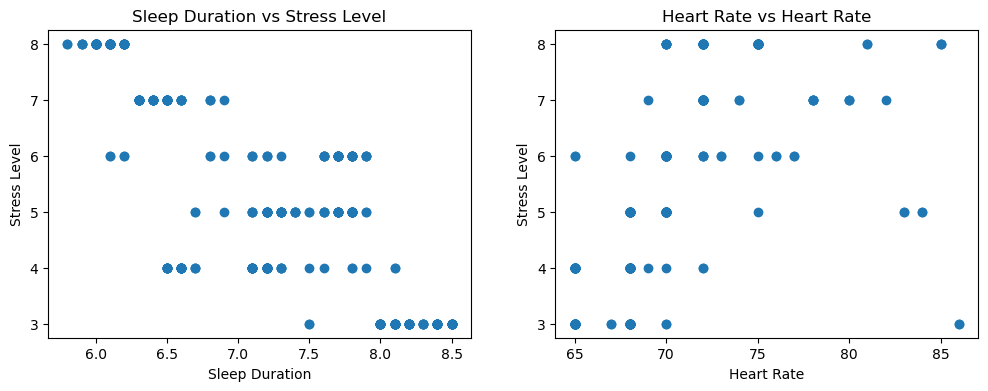

In [16]:
# Visualizing the relationship between stress levels and both sleep duration and heart rate

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Scatter plot for quality of sleep vs stress level
ax1.scatter(raw_data['Sleep Duration'], raw_data['Stress Level'])
ax1.set_title('Sleep Duration vs Stress Level')
ax1.set_xlabel('Sleep Duration')
ax1.set_ylabel('Stress Level')

# Scatter plot for quality of sleep vs sleep duration
ax2.scatter(raw_data['Heart Rate'], raw_data['Stress Level'])
ax2.set_title('Heart Rate vs Heart Rate')
ax2.set_xlabel('Heart Rate')
ax2.set_ylabel('Stress Level')

plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_6884\3453524219.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(occupation_quality.index, rotation=45)


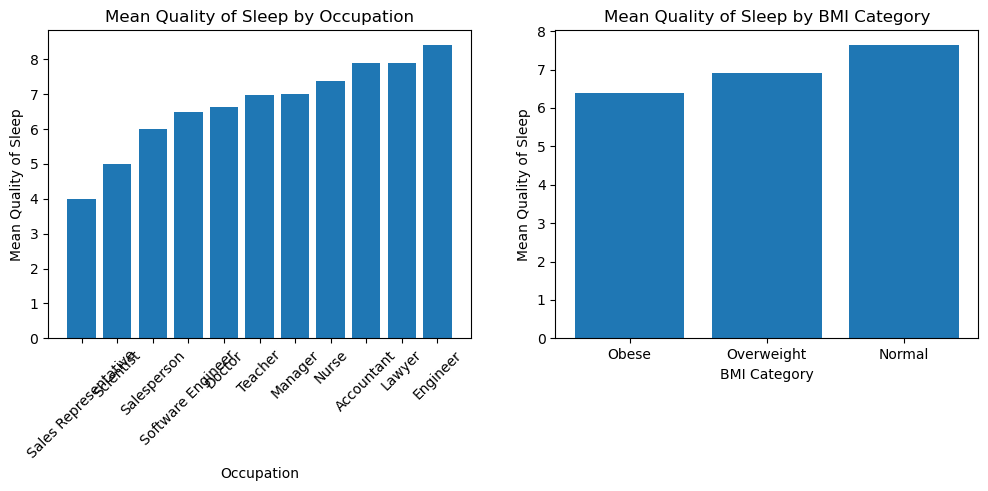

In [17]:
# Visualizing some of the categorical variables and their relation to quality of sleep

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
occupation_quality = raw_data.groupby('Occupation')['Quality of Sleep'].mean().sort_values()
bmi_quality = raw_data.groupby('BMI Category')['Quality of Sleep'].mean().sort_values()

# Bar plot for occupation vs quality of sleep
ax1.bar(occupation_quality.index, occupation_quality.values)
ax1.set_title('Mean Quality of Sleep by Occupation')
ax1.set_xlabel('Occupation')
ax1.set_ylabel('Mean Quality of Sleep')
ax1.set_xticklabels(occupation_quality.index, rotation=45)

# Bar plot for BMI vs quality of sleep
ax2.bar(bmi_quality.index, bmi_quality.values)
ax2.set_title('Mean Quality of Sleep by BMI Category')
ax2.set_xlabel('BMI Category')
ax2.set_ylabel('Mean Quality of Sleep')

plt.show()


In [18]:
#Create a linear regression model to predict quality of sleep
from sklearn.linear_model import LinearRegression

# Define the response variable and predictors
X = data_num[['Sleep Duration', 'Stress Level', 'Heart Rate']]
y = data_num['Quality of Sleep']

model = LinearRegression()

# Fit the model
model.fit(X, y)

# Print the coefficients
print('Coefficients:', model.coef_)


Coefficients: [ 0.69333281 -0.29661064 -0.03681626]


In [19]:
#Create a linear regression model to predict sleep duration
from sklearn.linear_model import LinearRegression

# Define the response variable and predictors
X = data_num[['Stress Level', 'Heart Rate']]
y = data_num['Sleep Duration']

model = LinearRegression()

# Fit the model
model.fit(X, y)

# Print the coefficients
print('Coefficients:', model.coef_)


Coefficients: [-0.37833747  0.00940953]


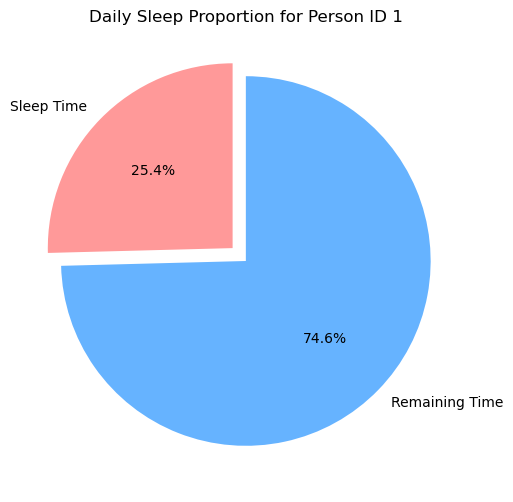

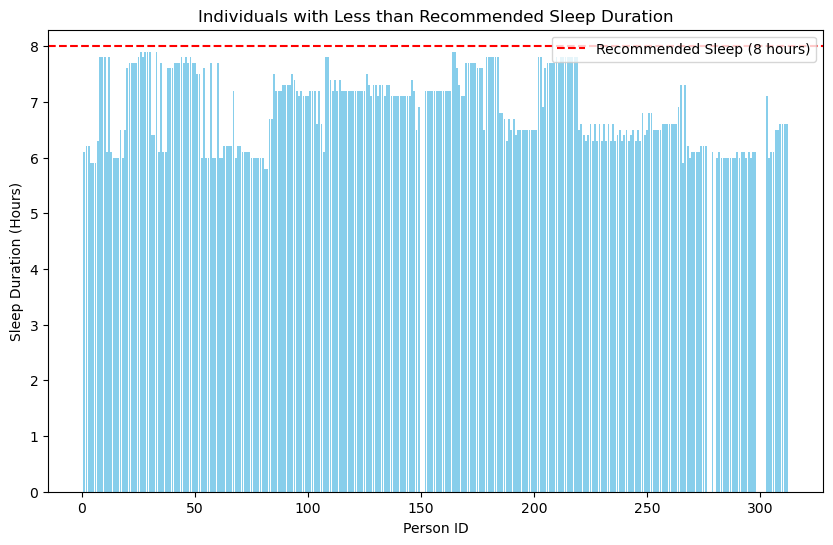

     Person ID  Sleep Duration  Sleep Percentage  \
0            1             6.1             76.25   
1            2             6.2             77.50   
2            3             6.2             77.50   
3            4             5.9             73.75   
4            5             5.9             73.75   
..         ...             ...               ...   
369        370             8.1            101.25   
370        371             8.0            100.00   
371        372             8.1            101.25   
372        373             8.1            101.25   
373        374             8.1            101.25   

                Exercise Suggestion  
0    Relaxation Breathing Exercises  
1                Yoga or Meditation  
2                Yoga or Meditation  
3                Yoga or Meditation  
4                Yoga or Meditation  
..                              ...  
369       Moderate Aerobic Exercise  
370       Moderate Aerobic Exercise  
371       Moderate Aerobic Exerci

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
file_path = 'sleep_health_data.csv'
sleep_data = pd.read_csv(file_path)

recommended_sleep = 8  
sleep_data['Sleep Deficit/Surplus'] = sleep_data['Sleep Duration'] - recommended_sleep
sleep_data['Sleep Percentage'] = (sleep_data['Sleep Duration'] / recommended_sleep) * 100

# Function to suggest exercises for improving sleep
def suggest_exercise(stress_level, sleep_quality):
    if stress_level > 7:
        return "Yoga or Meditation"
    elif sleep_quality < 5:
        return "Light Stretching or Evening Walk"
    elif stress_level <= 5 and sleep_quality >= 7:
        return "Moderate Aerobic Exercise"
    else:
        return "Relaxation Breathing Exercises"

# Add exercise suggestions to the data
sleep_data['Exercise Suggestion'] = sleep_data.apply(
    lambda row: suggest_exercise(row['Stress Level'], row['Quality of Sleep']), axis=1
)

# Visualize sleep percentage as a pie chart for the first individual
def display_pie_chart(person_data):
    labels = ['Sleep Time', 'Remaining Time']
    sizes = [person_data['Sleep Duration'], 24 - person_data['Sleep Duration']]
    colors = ['#ff9999', '#66b3ff']
    explode = (0.1, 0)  # Explode the sleep portion

    plt.figure(figsize=(6, 6))
    plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
    plt.title(f"Daily Sleep Proportion for Person ID {person_data['Person ID']}")
    plt.show()

# Display pie chart for the first person in the dataset
display_pie_chart(sleep_data.iloc[0])

# Find individuals with less than the recommended sleep
less_sleep_data = sleep_data[sleep_data['Sleep Duration'] < recommended_sleep]

# Bar graph for individuals with less sleep
def display_less_sleep_graph(less_sleep_data):
    plt.figure(figsize=(10, 6))
    plt.bar(less_sleep_data['Person ID'], less_sleep_data['Sleep Duration'], color='skyblue')
    plt.axhline(y=recommended_sleep, color='r', linestyle='--', label='Recommended Sleep (8 hours)')
    plt.title('Individuals with Less than Recommended Sleep Duration')
    plt.xlabel('Person ID')
    plt.ylabel('Sleep Duration (Hours)')
    plt.legend()
    plt.show()

display_less_sleep_graph(less_sleep_data)

# Display sleep data with key attributes
print(sleep_data[['Person ID', 'Sleep Duration', 'Sleep Percentage', 'Exercise Suggestion']])
